In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [78]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100,2:]
y = iris.target[:100]
len(y)

100

In [79]:
pd.DataFrame(X).tail()

,0,1
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1
99,4.1,1.3


In [80]:
from sklearn.svm import SVC

model = SVC(kernel='linear').fit(X, y) 


In [105]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()


xx = np.linspace(xmin,xmax,10)
yy = np.linspace(ymin,ymax,10)

X1,X2 = np.meshgrid(xx,yy) ## 그리드 생성 ## 10*10
X2.shape
Z = np.empty(X1.shape)
Z
model.support_vectors_


array([[ 1.9,  0.4],
       [ 3. ,  1.1]])

In [113]:
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
p

array([ 3.59000003])

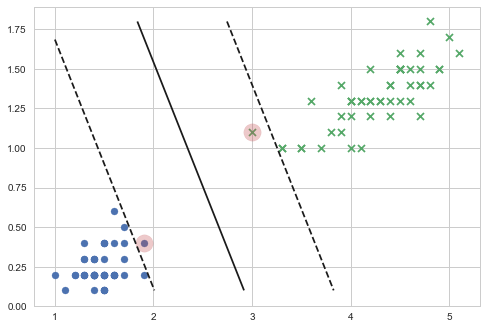

In [114]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10) 
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy) ## x축과 y축의 그리드 생성 x의 최소값과 최대값사이, y의 최대값과 최소값 사이의 숫자를 조합하여 그리드생성

Z = np.empty(X1.shape) ## 10*10 의 shape 만큼 비어있는 값들 설정하여 반환
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], ## 서포트 벡터의 x값
            model.support_vectors_[:, 1], ## 서포트 벡터의 y값들 
            s=300, alpha=0.3)
plt.show()
